##exploring a toy dataset


In [1]:
%matplotlib inline 

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import scipy.cluster.hierarchy as hac
from itertools import cycle
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA, FastICA
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import sompy as SOM

**vorbereitung**: import modules, data, setup figure

In [2]:
df = pd.read_csv("coordinates.txt", sep=' ')

#df = df[['c','d']]
#print(df)

matrix = df.as_matrix()

sns.set()

##Scatterplot Matrix

**+PCA, ICA**

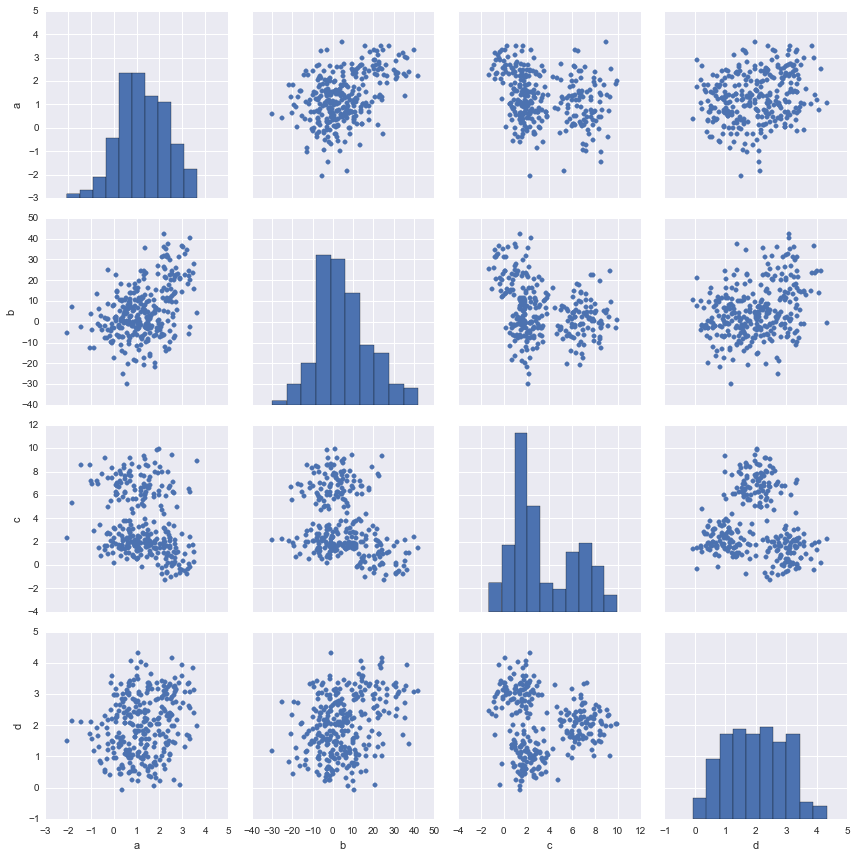

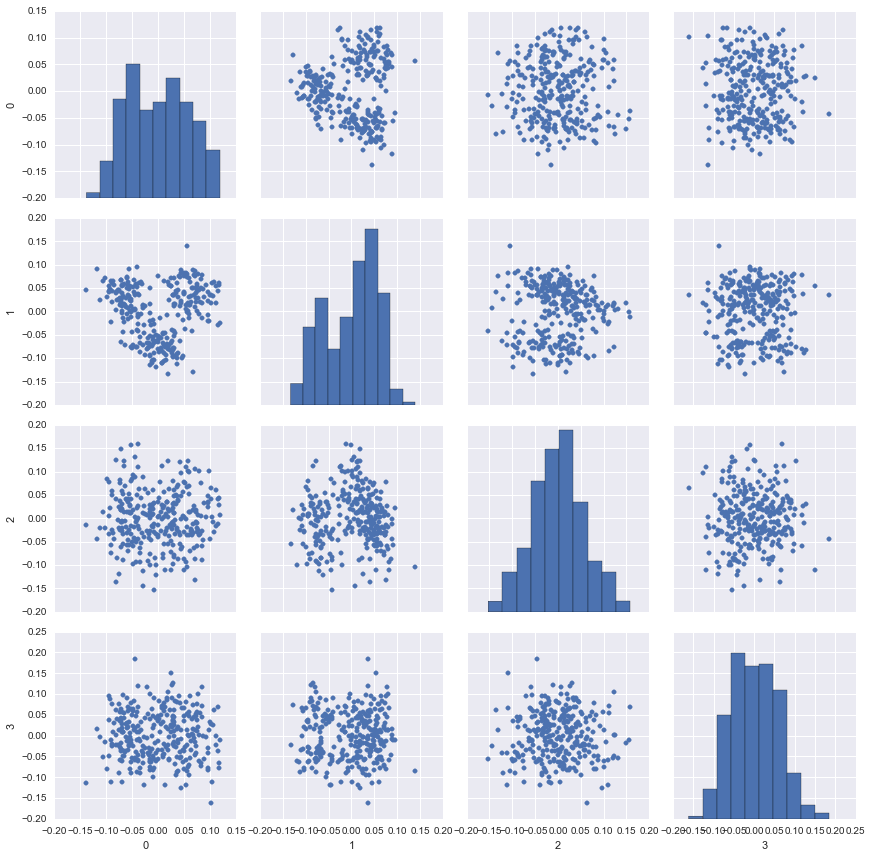

In [70]:
# raw
sns.pairplot(df)

# PCA
#reduced = PCA(n_components=4).fit_transform(matrix)

# ICA
rng = np.random.RandomState(42)
ica = FastICA(random_state=rng)
reduced = FastICA(n_components=4).fit_transform(matrix)

# display reduced
df_reduced = pd.DataFrame(reduced)
sns.pairplot(df_reduced)

##kernel density plot

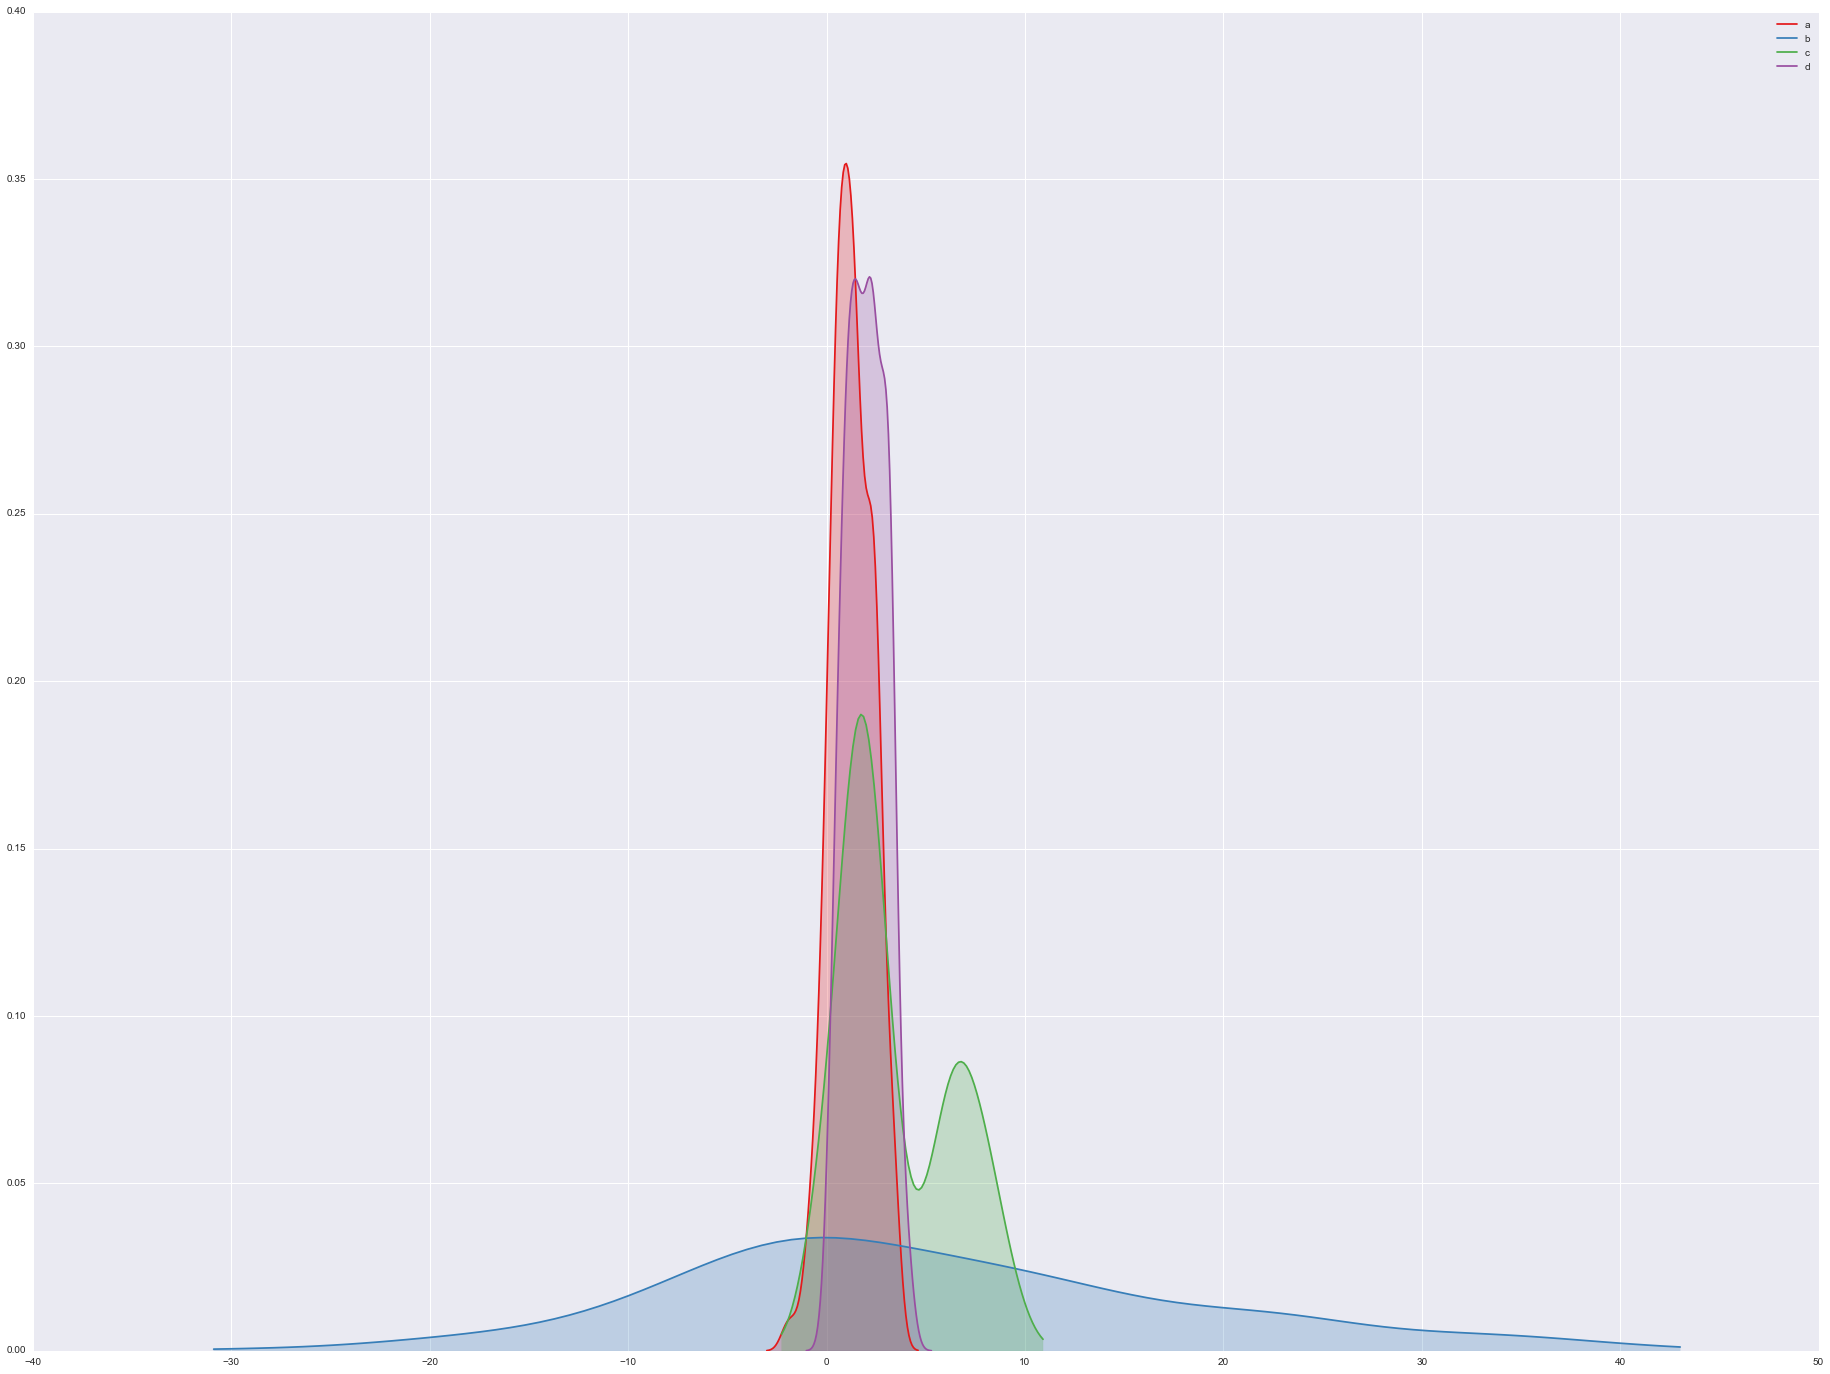

In [333]:
plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

#sns.kdeplot(df, shade=True)

with sns.color_palette("Set1"):
    for label in df.columns:
        sns.kdeplot(df[label], vertical=False, shade=True, label=label)

##PCA + kernel density plot

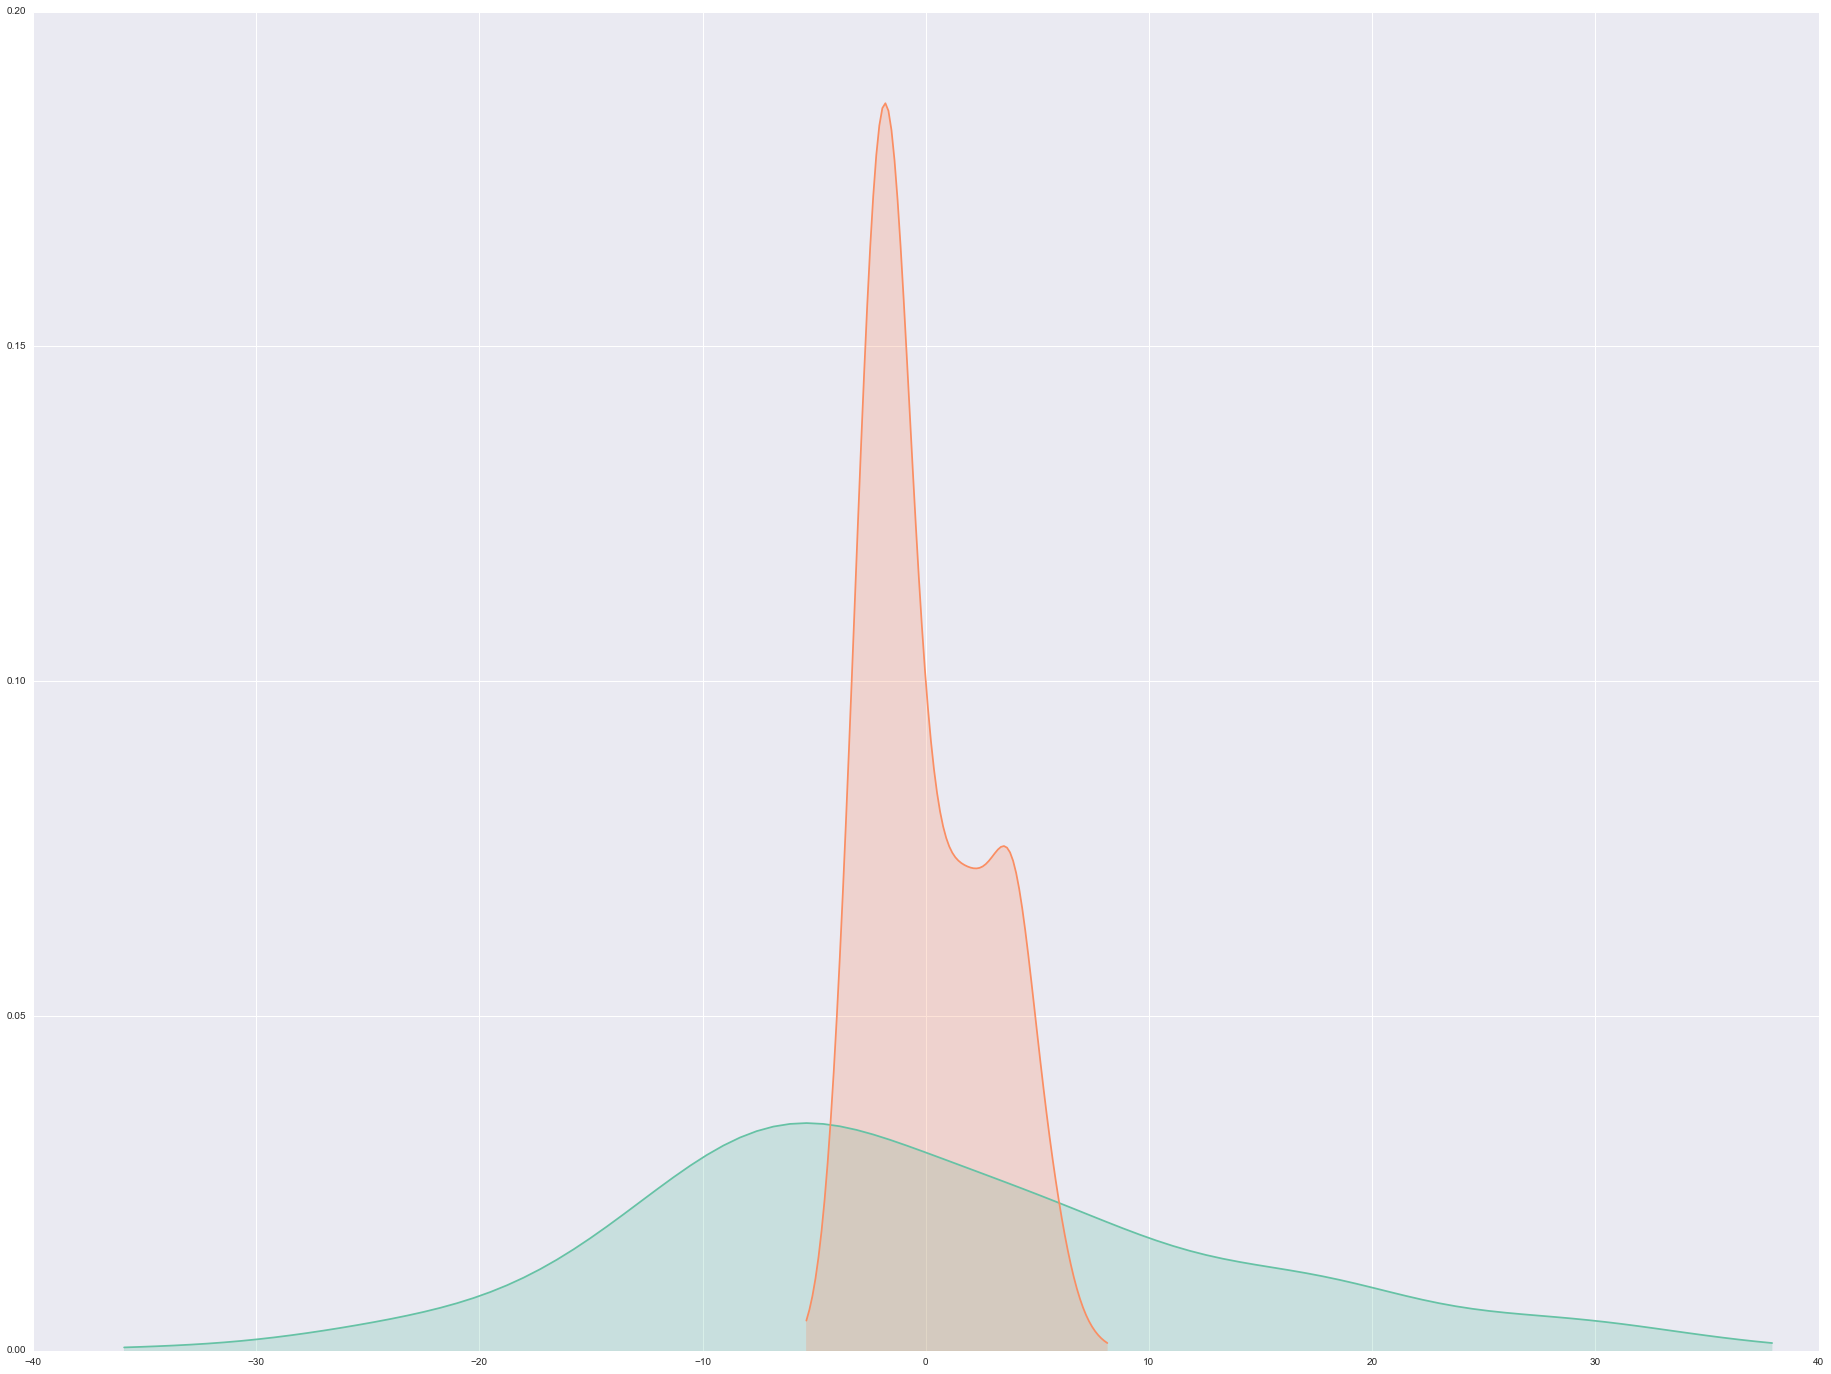

In [68]:
plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

c=2

reduced = PCA(n_components=c).fit_transform(matrix)
#print(reduced)

i=0
with sns.color_palette("Set2"):
    while i < c:
        sns.kdeplot(reduced[:, i], vertical=False, shade=True)
        i+=1

##PCA + scatter plot

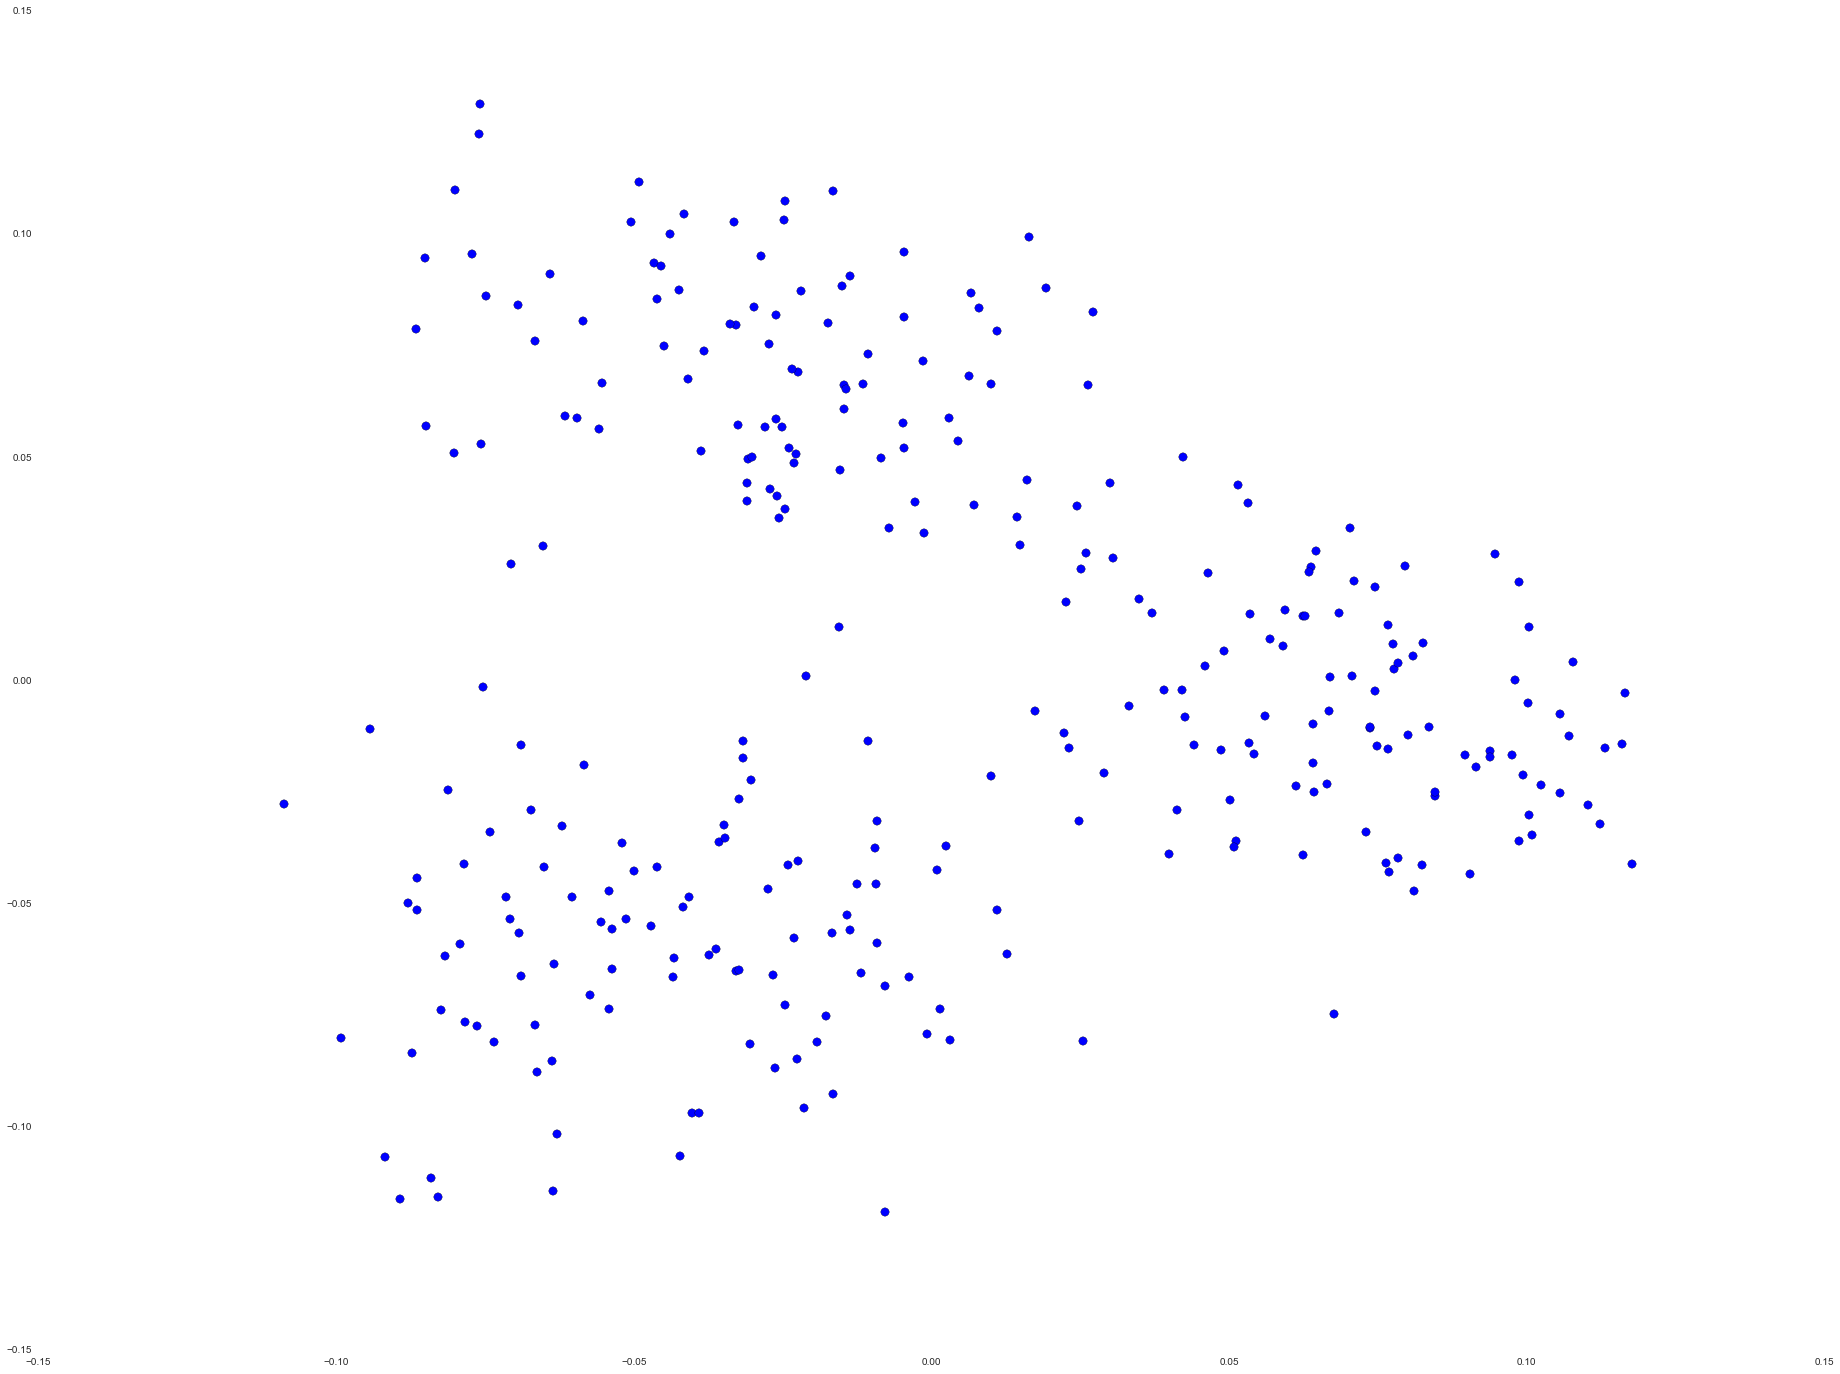

In [46]:
plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

# PCA
#reduced = PCA(n_components=2).fit_transform(matrix)

# ICA
rng = np.random.RandomState(42)
ica = FastICA(random_state=rng)
reduced = FastICA(n_components=4).fit_transform(matrix)

plt.scatter(reduced[:, 0], reduced[:, 1], s=70)

##PCA + 3d scatter plot

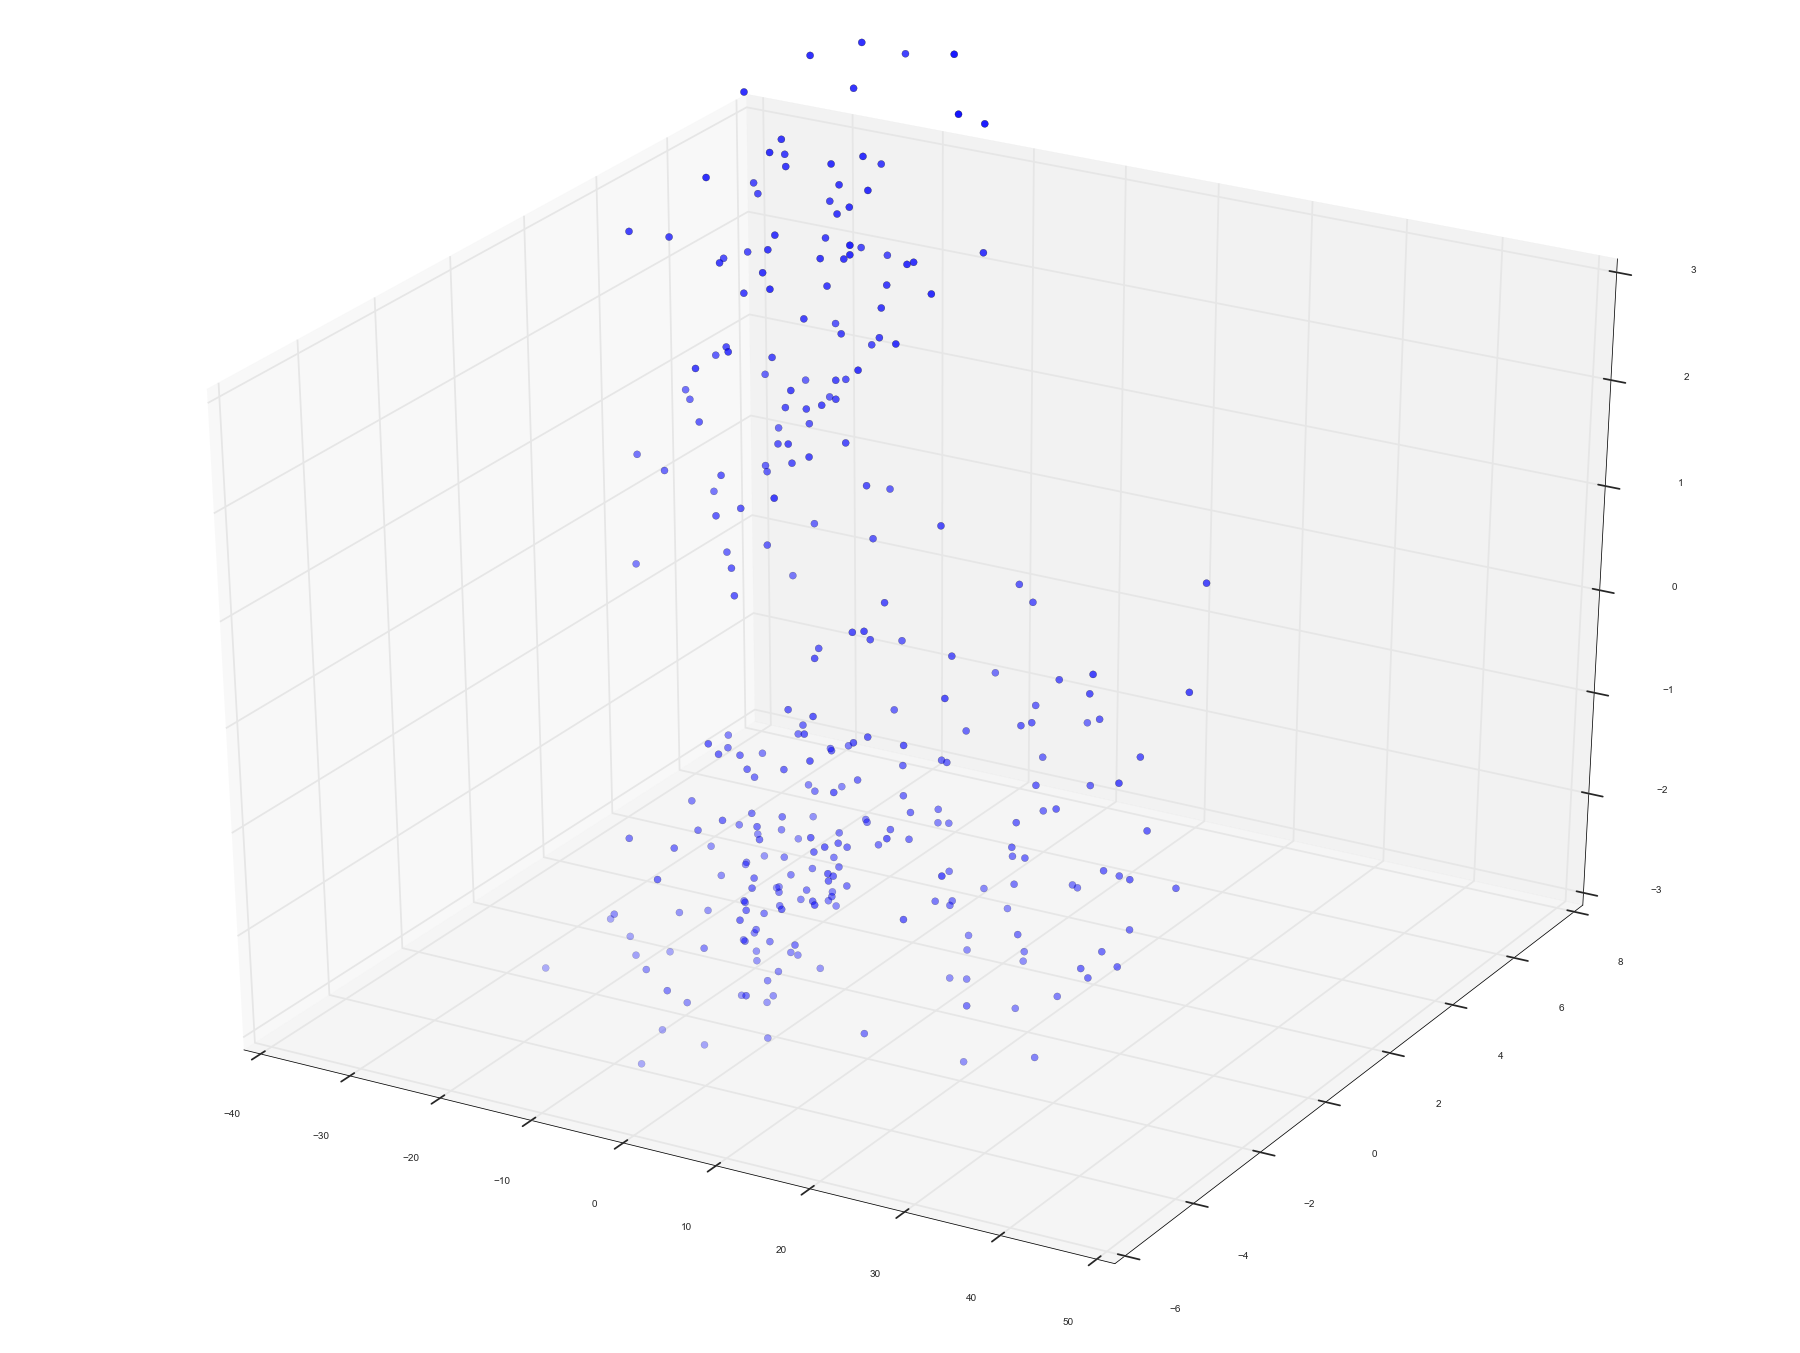

In [45]:
# PCA
reduced = PCA(n_components=3).fit_transform(matrix)

# ICA
#rng = np.random.RandomState(42)
#ica = FastICA(random_state=rng)
#reduced = FastICA(n_components=4).fit_transform(matrix)

fig = plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], zdir=u'y', s=50)

##KMeans

silhouette averages (scheint wenig aussagekräftig; höchster wert immer bei 2 clustern):

- 2 cluster = 0.529013748304
- 3 cluster = 0.449198567709
- 4 cluster = 0.417410465738
- 5 cluster = 0.399826180044

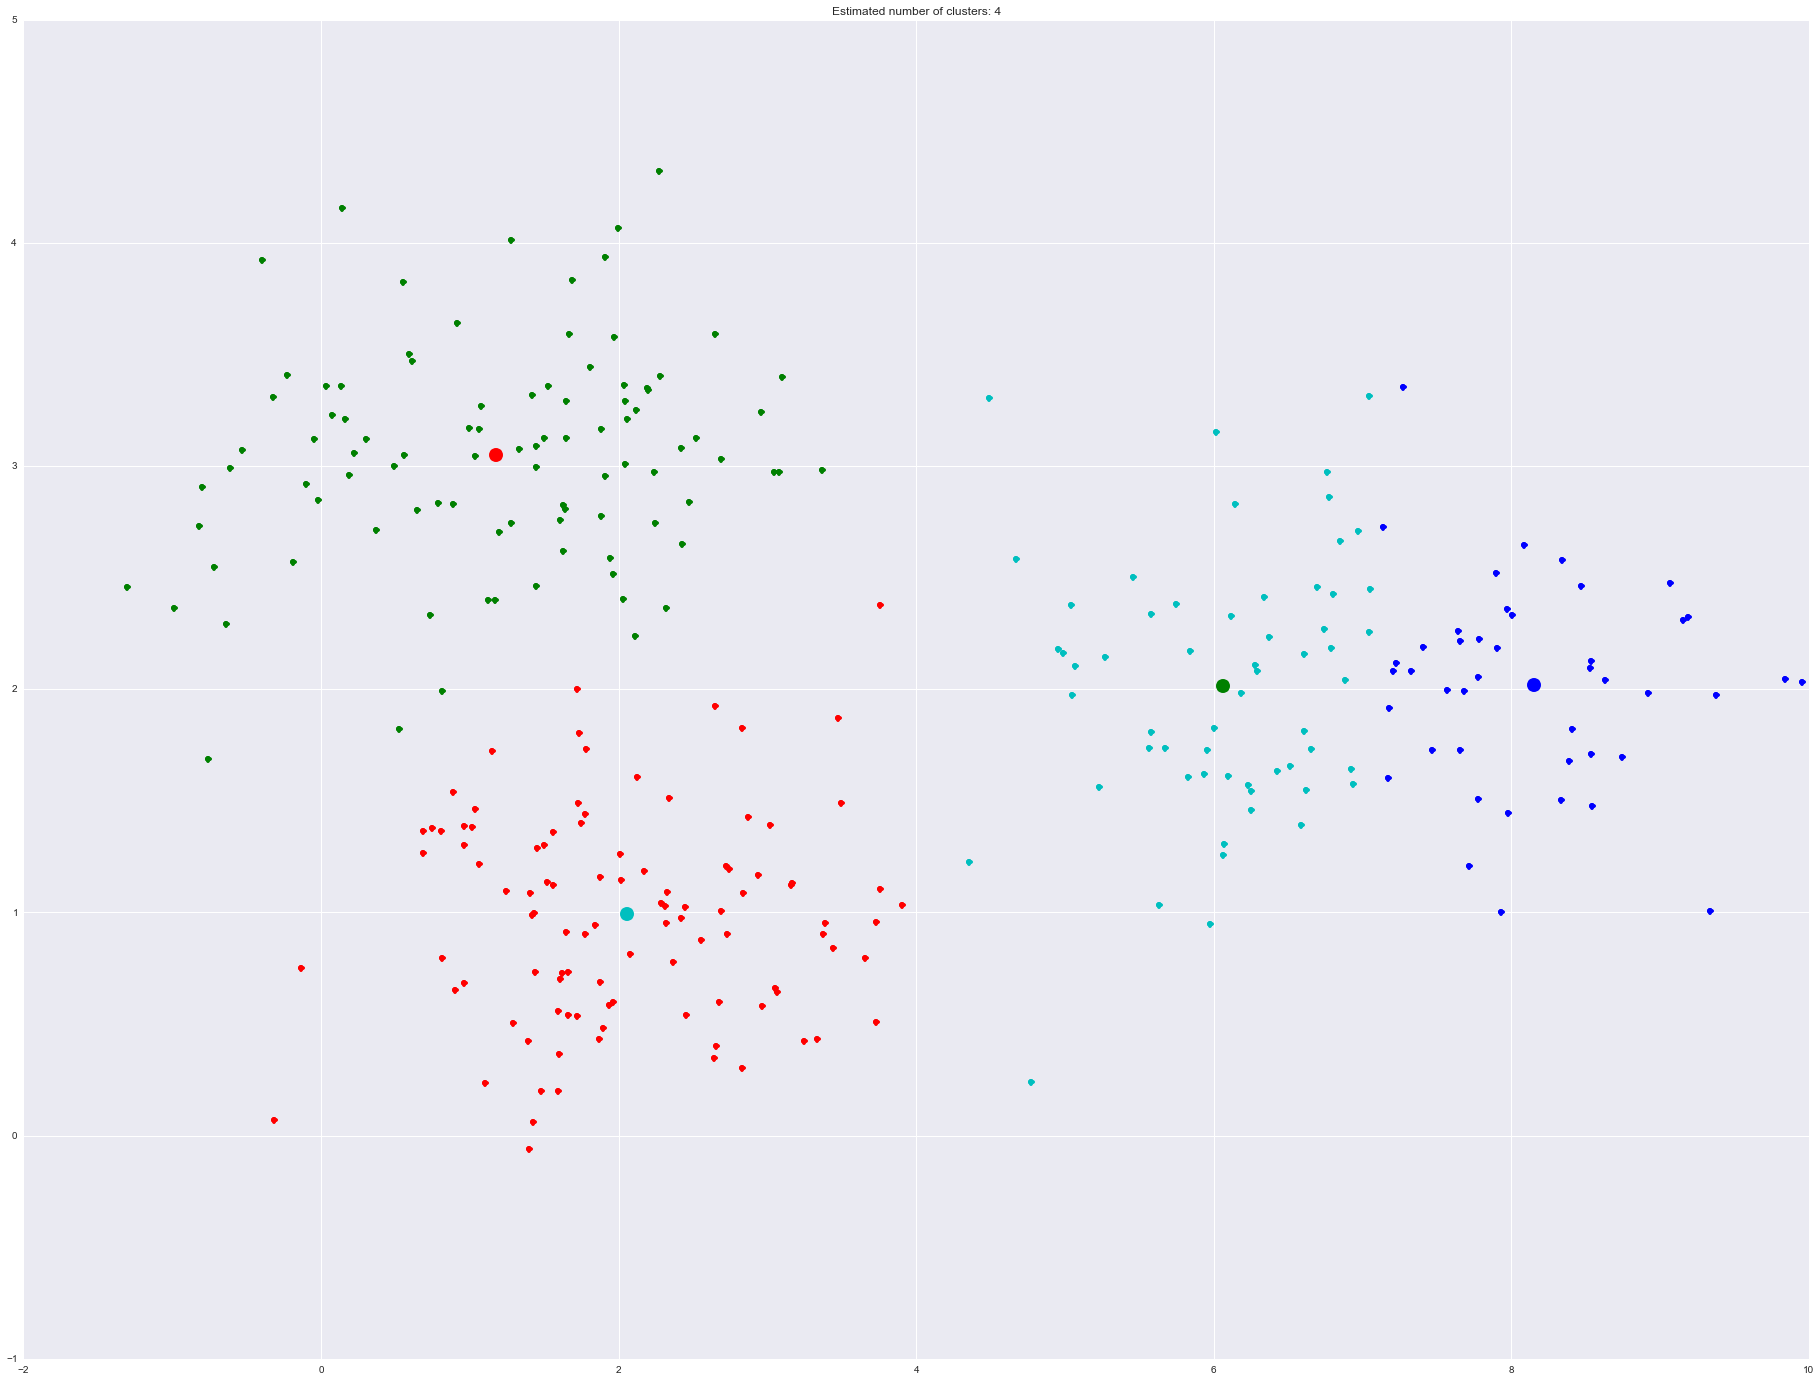

In [3]:
plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

#reduced = PCA(n_components=2).fit_transform(matrix)
#reduced = matrix

reduced = df[['c','d']].as_matrix()

c=4

km = KMeans(n_clusters=c, init='random', max_iter=100).fit(reduced)

cluster_centers = km.cluster_centers_
labels = km.fit_predict(reduced)

#silhouette_avg = silhouette_score(reduced, labels)
#print(silhouette_avg)

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(c), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(reduced[my_members, 0], reduced[my_members, 1], col + 'o', markersize=7)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % c)

##MeanShift

silhouette averages (scheint wenig aussagekräftig; höchster wert immer bei 2 clustern):

- 2 cluster = 0.548774266342
- 3 cluster = 0.425532066841
- 4 cluster = 0.41681528842
- 5 cluster = 0.416589842863
- 6 cluster = 0.410831775871

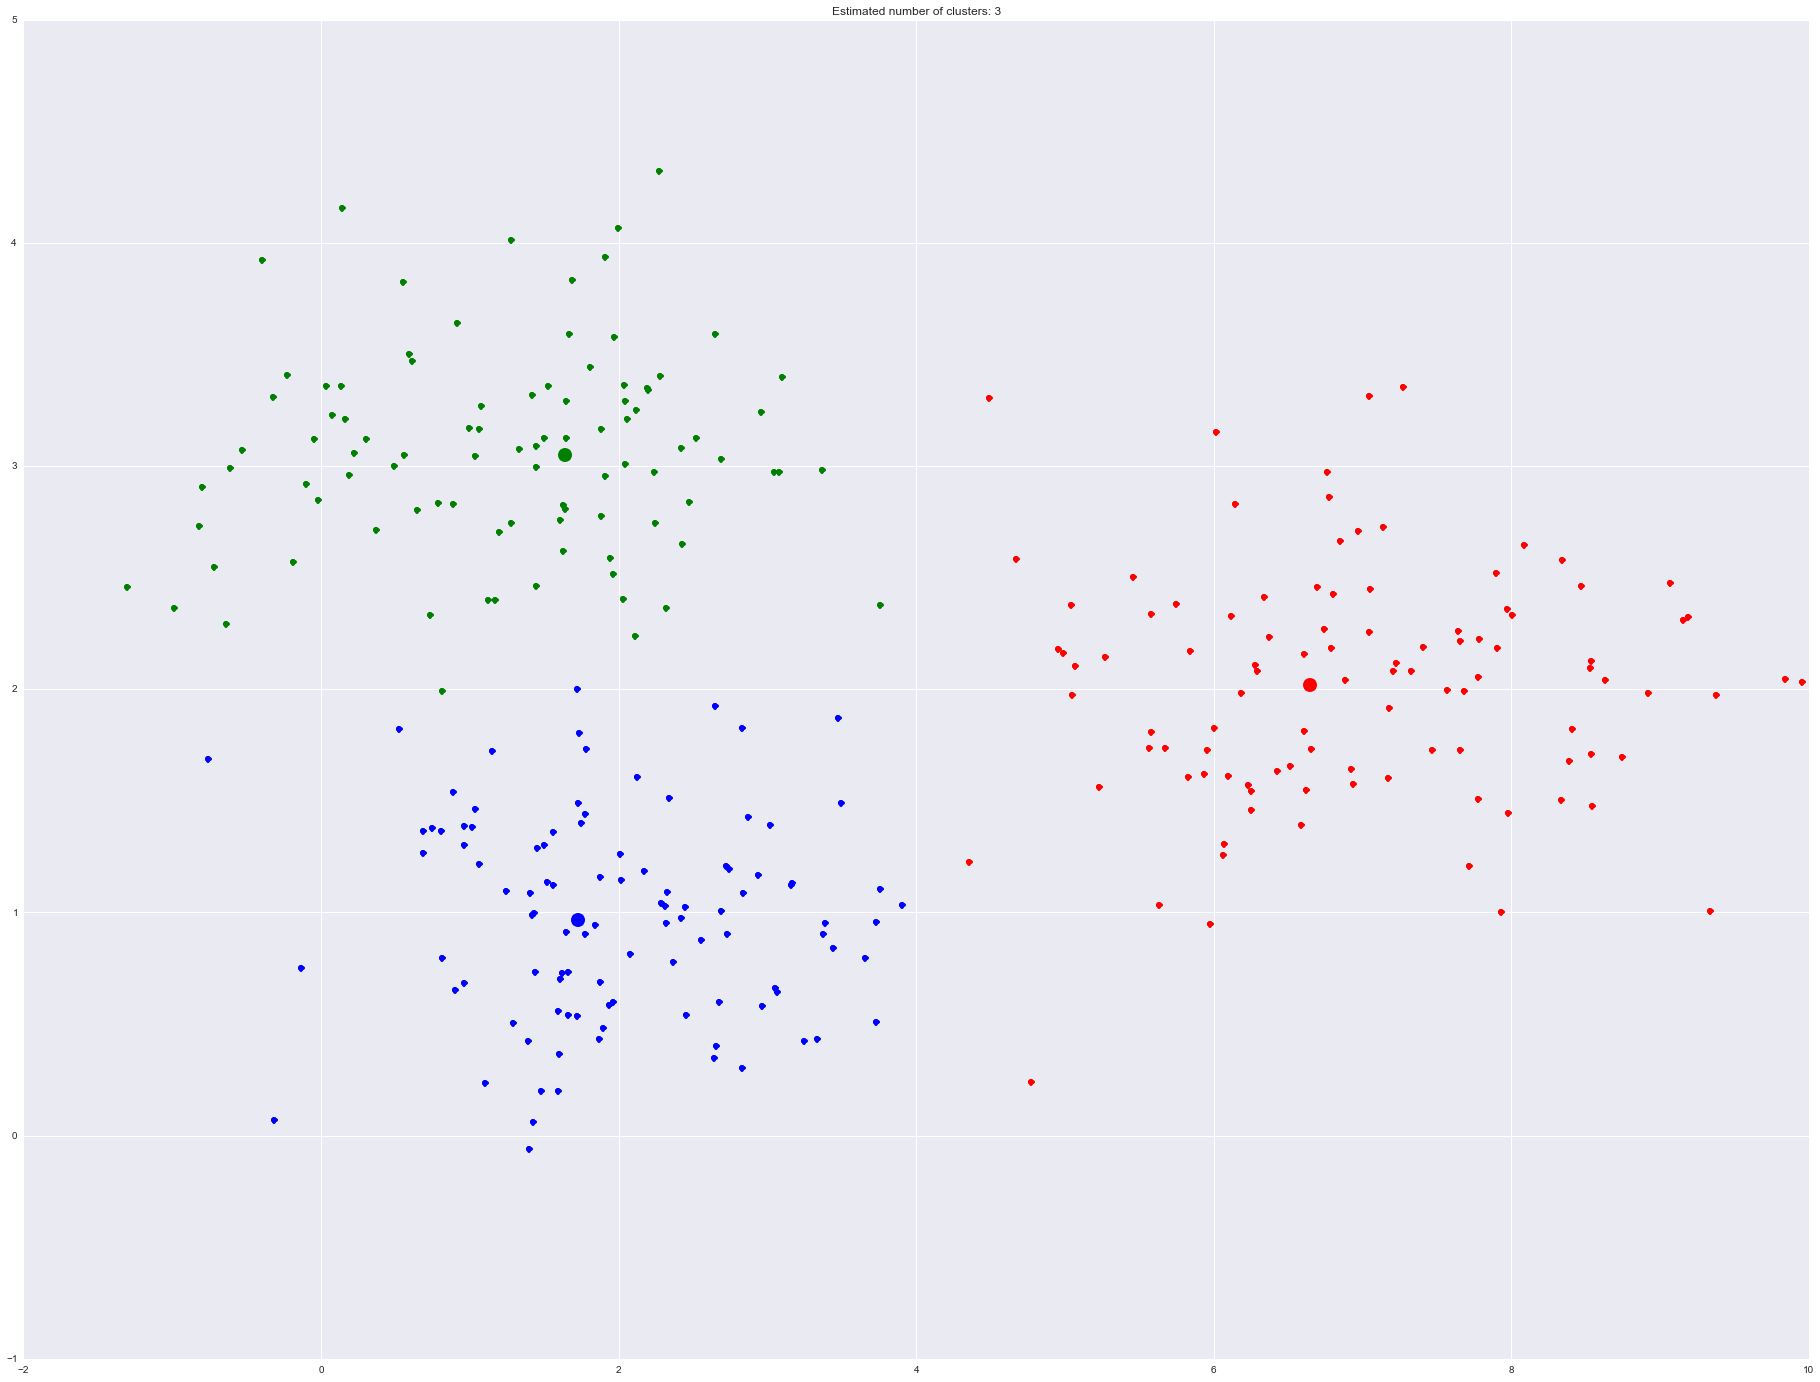

In [90]:
plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

#reduced = PCA(n_components=2).fit_transform(matrix)
#reduced = matrix

reduced = df[['c','d']].as_matrix()

bandwidth = estimate_bandwidth(reduced, quantile=0.14)
# quantile: should be between [0, 1] 0.5 means that the median of all pairwise distances is used

ms = MeanShift(bandwidth=bandwidth).fit(reduced)
#ms = MeanShift(bandwidth=5.5, cluster_all=True).fit(reduced)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

#silhouette_avg = silhouette_score(reduced, labels)
#print(silhouette_avg)

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(reduced[my_members, 0], reduced[my_members, 1], col + 'o', markersize=7)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

##AffinityPropagation

preference argument von AffinityPropagation eignet sich zur steuerung, wie viele cluster gefunden werden (damping hingegen nicht): je größer der (negative) wert, desto weniger cluster werden gefunden

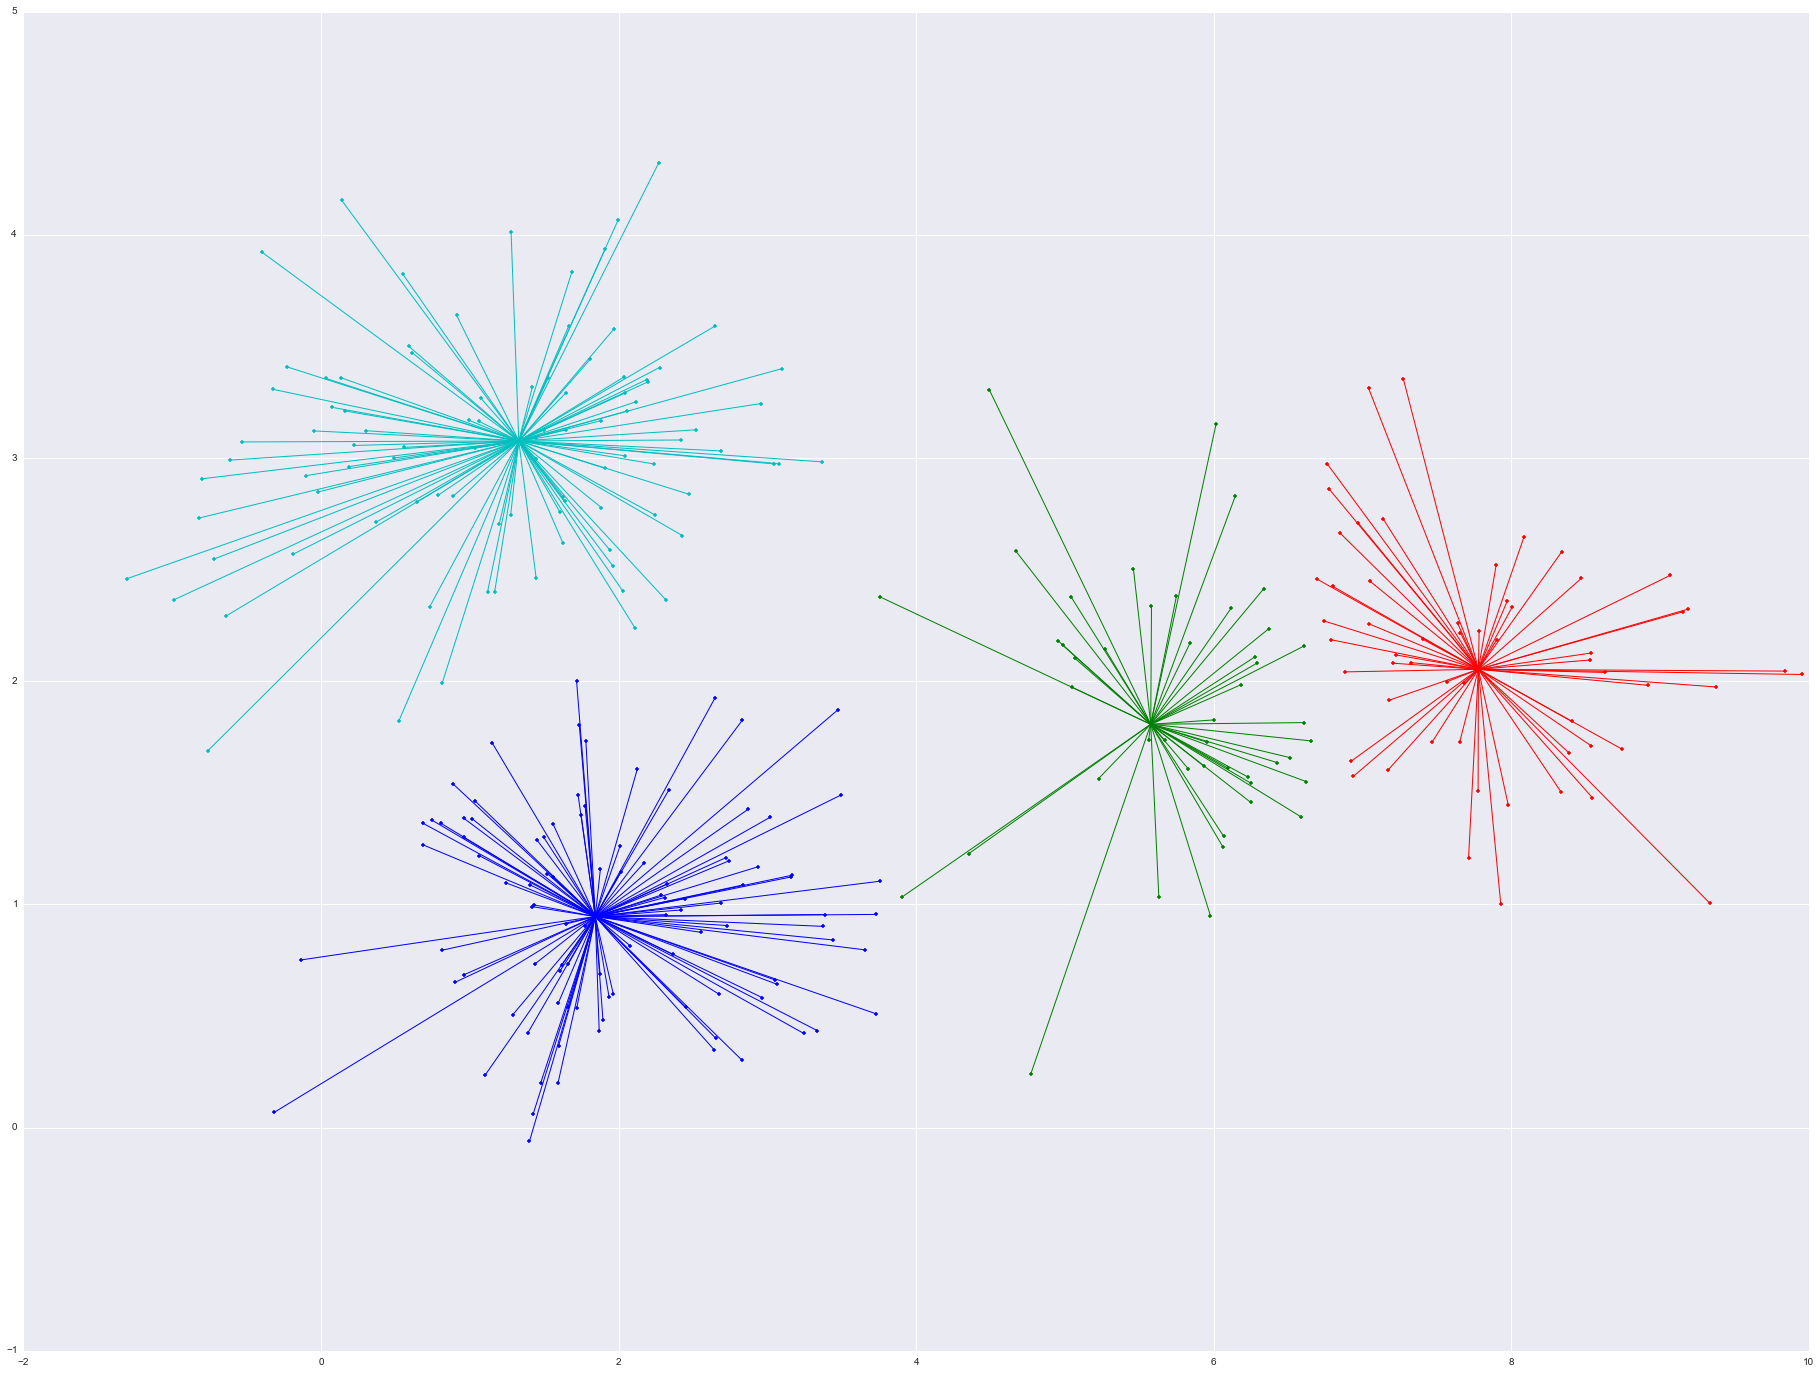

In [5]:
plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

#reduced = PCA(n_components=2).fit_transform(matrix)
#reduced = matrix

reduced = df[['c','d']].as_matrix()

#af = AffinityPropagation().fit(reduced)
af = AffinityPropagation(damping=0.5, preference=-140).fit(reduced)

# damping : Damping factor between 0.5 and 1.
# preference : array-like, shape (n_samples,) or float, optional
# Preferences for each point - points with larger values of preferences
# are more likely to be chosen as exemplars. The number of exemplars,
# ie of clusters, is influenced by the input preferences value.
# If the preferences are not passed as arguments, they will be set
# to the median of the input similarities.

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = reduced[cluster_centers_indices[k]]

        plt.plot(reduced[class_members, 0], reduced[class_members, 1], col + ".")
        plt.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markersize=2)

        for x in reduced[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, linestyle='-', linewidth=1)

##Agglomerative clustering

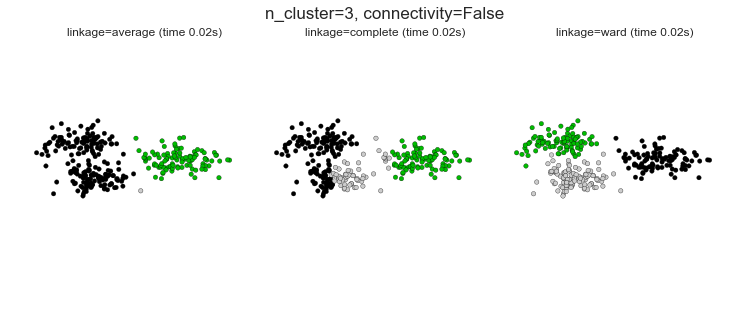

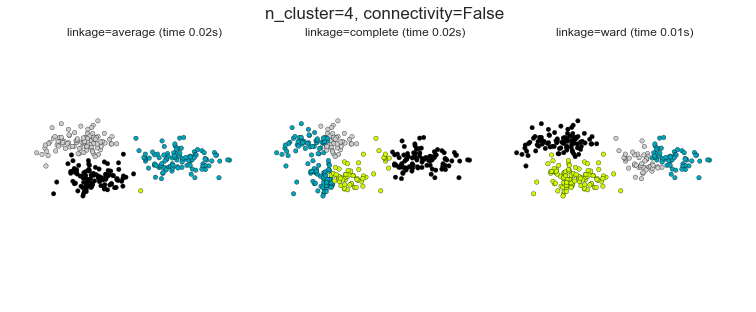

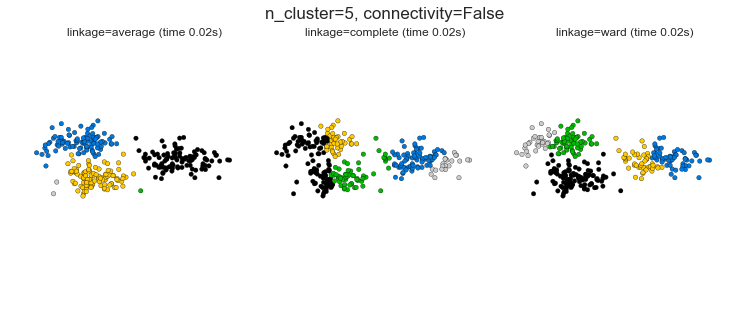

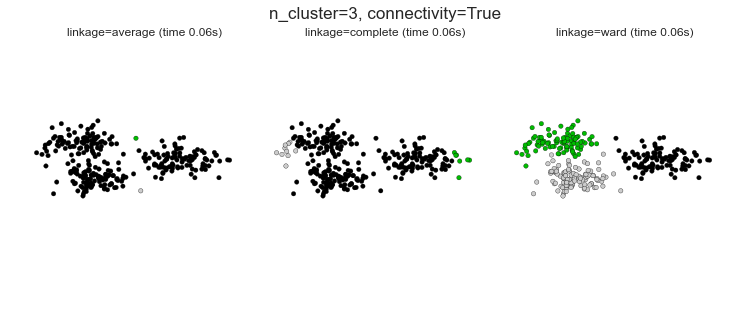

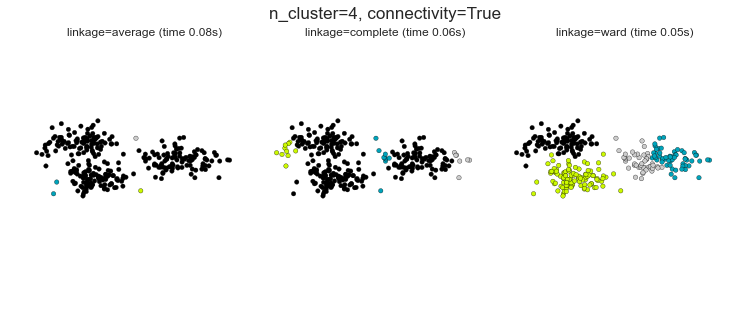

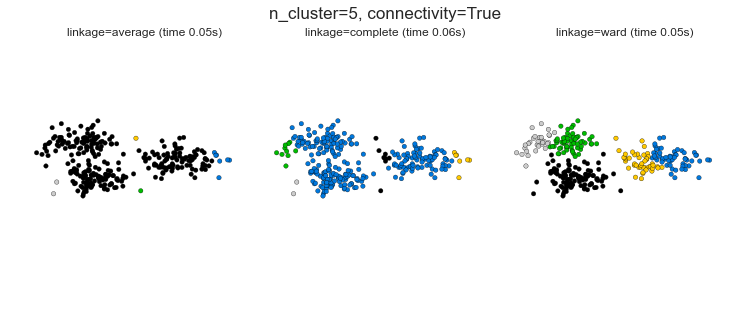

In [87]:
plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

#reduced = PCA(n_components=2).fit_transform(matrix)
#reduced = matrix

reduced = df[['c','d']].as_matrix()

#model = AgglomerativeClustering(n_clusters=2).fit(reduced)
#plt.scatter(reduced[:, 0], reduced[:, 1], c=model.labels_, cmap=plt.cm.spectral)

knn_graph = kneighbors_graph(reduced, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (3, 4, 5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(reduced)
            elapsed_time = time.time() - t0
            plt.scatter(reduced[:, 0], reduced[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)

##agglomerative clustering mit scipy

IndexError: list index out of range

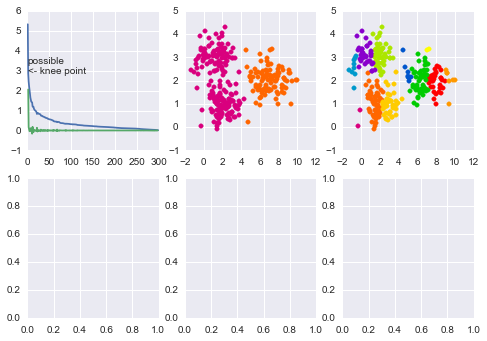

In [89]:
plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

#a = PCA(n_components=2).fit_transform(matrix)
#a = matrix
a = df[['c','d']].as_matrix()

fig, axes23 = plt.subplots(2, 3)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
for method, axes in zip(['centroid', 'median'], axes23):
    z = hac.linkage(a, method=method)

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 2

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hac.fcluster(z, num_clust1, 'maxclust')
    part2 = hac.fcluster(z, num_clust2, 'maxclust')

    clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(a[part == cluster, 0], a[part == cluster, 1], color=clr[cluster])

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()

##(3D) scatter plot colored by density

cf. http://stackoverflow.com/a/20107592

**+ PCA, ICA**

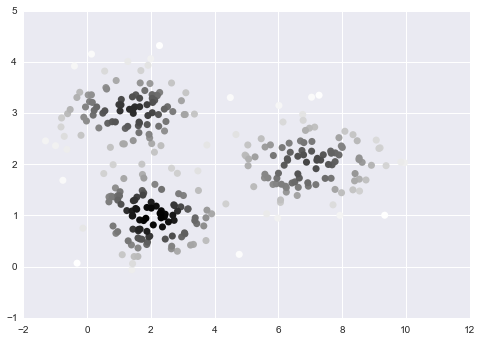

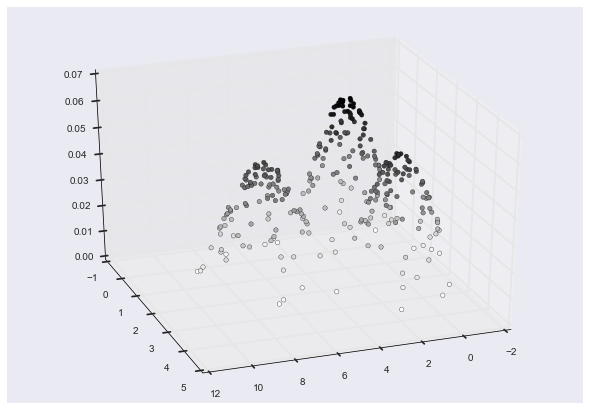

In [82]:
fig = plt.figure(num=1, figsize=(32, 24), dpi=80, facecolor="w", edgecolor="k")

# raw
x = df[['c']].as_matrix()
y = df[['d']].as_matrix()

# PCA
#reduced = PCA(n_components=2).fit_transform(matrix)

# ICA
#rng = np.random.RandomState(42)
#ica = FastICA(random_state=rng)
#reduced = FastICA(n_components=2).fit_transform(matrix)

#x = reduced[:, 0]
#y = reduced[:, 1]

# Calculate the point density
xy = np.vstack([x.ravel(),y.ravel()])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# 2D
fig, ax1 = plt.subplots()
ax1.scatter(x, y, c=z, s=50, edgecolor='')

# 3D
fig, ax2 = plt.subplots()
ax2 = Axes3D(fig)
ax2.scatter(x, y, z, c=z, depthshade=False)
ax2.azim += 130
           
plt.show()

##self organizing map

**+ PCA, ICA**

cf. http://nbviewer.ipython.org/urls/gist.githubusercontent.com/sevamoo/8f26d64470e00960684a/raw/SOMPY_example

cf. http://nbviewer.ipython.org/urls/gist.githubusercontent.com/sevamoo/01753060b059941b4545/raw/1c9597257308c63fe601478f6e6d0d6d63fa80a3/somPy%20Example2

"SOM may be considered a nonlinear generalization of PCA", https://en.wikipedia.org/wiki/Self-organizing_map

Data size:  (300, 4)
Training is done in:  8.017690181732178 seconds
clustering based on default parameters...


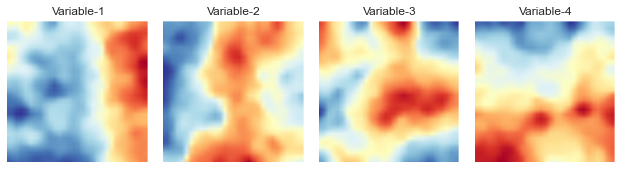

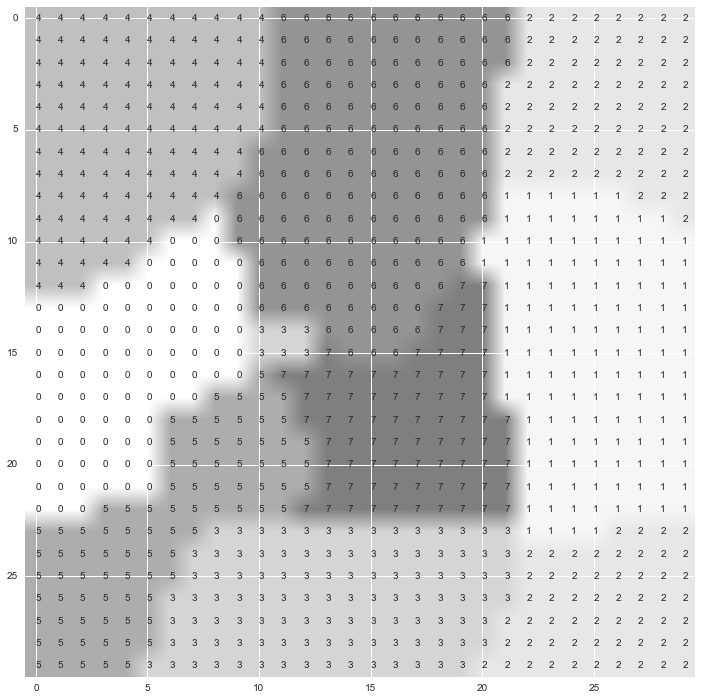

array([[  0,   0,   0],
       [  0,   1,   1],
       [  0,   2,   2],
       ..., 
       [ 29,  27, 897],
       [ 29,  28, 898],
       [ 29,  29, 899]])

In [54]:
# PCA
#reduced = PCA(n_components=2).fit_transform(matrix)

# ICA
rng = np.random.RandomState(42)
ica = FastICA(random_state=rng)
reduced = FastICA(n_components=4).fit_transform(matrix)

#The critical factor which increases the computational time, but mostly the memory problem is the size of SOM (i.e. msz0,msz1), 
#other wise the training data will be parallelized  
msz0 = 30
msz1 = 30

#Data = np.random.rand(1*1000,20)
#Data = matrix
Data = reduced
print('Data size: ', Data.shape)

#Put this if you are updating the sompy codes
#reload(sys.modules['sompy'])

t0 = time.time()
sm = SOM.SOM('sm', Data, mapsize = [msz0, msz1], norm_method = 'var', initmethod='pca')
sm.train(n_job = 1, shared_memory = 'no', verbose='off')
print('Training is done in: ', time.time()-t0, 'seconds')

sm.view_map( what='codebook', which_dim='all', 
            pack='Yes', text_size=2.8, save='No', 
            save_dir='empty', grid='No', text='Yes', cmap='None', COL_SiZe=6)

#sm.view_map_dot()

#sm.hit_map()

sm.hit_map_cluster_number()
